# Домашно 2
# мартин Върбанов №165 Спец. Статистика

## Да се направи интерактивен slidebar, който да генерира тестов dataset и тренира Random Forest model, базиран на input 

In [1]:
import sys
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

In [2]:
from sklearn.datasets import make_moons
help(make_moons)

Help on function make_moons in module sklearn.datasets.samples_generator:

make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
    Make two interleaving half circles
    
    A simple toy dataset to visualize clustering and classification
    algorithms. Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated.
    
    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.
    
    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.
    
    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    
    Returns
    -------
    X : array of shape [n_samples, 2]
        The 

In [3]:
plt.scatter(make_moons())

TypeError: scatter() missing 1 required positional argument: 'y'

### Нека да си направим един примерен dataset:

In [ ]:
samples = 1000
noise = 0.1
random_state = 0
X, y = make_moons(samples, noise=noise, random_state=random_state)
red = X[y == 0]
blue = X[y == 1]
plt.figure(figsize=(10, 6))
plt.scatter(red[:, 0],  red[:, 1],  color='red', alpha=1, s=60)
plt.scatter(blue[:, 0], blue[:, 1], color='blue', alpha=1, s=60);

### Нека да тестваме нечие демо, за slidebar

In [11]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [12]:
def plot_logistic_moons(X, y, degree=1, C=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    pipeline = make_pipeline(
        PolynomialFeatures(degree=degree, interaction_only=False, include_bias=False),
        LogisticRegression(C=C)
    )
    classifier = pipeline.fit(X_train, y_train)
    
    print("train:", classifier.score(X_train, y_train))
    print("test: ", classifier.score(X_test, y_test))

    plt.figure(figsize=(10, 6))
    eps = X.std() / 2.
    ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 700)
    yy = np.linspace(y_min, y_max, 700)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]

    cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
    decision_values = classifier.predict(X_grid)
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max, y_min, y_max),
              aspect='auto', origin='lower', alpha=1, cmap=cmap)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train: 0.8213333333333334
test:  0.764


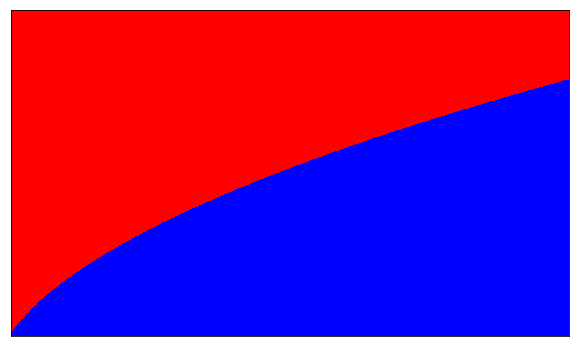

In [13]:


X, y = make_moons(1000, noise=0.5, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
plot_logistic_moons(X, y, degree=2, C=1)

### Нека преработим малко функцията:

In [14]:
def plot_logistic_moons(samples, noise, degree=1, C=1):
    X, y = make_moons(samples, noise=noise, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    pipeline = make_pipeline(
        PolynomialFeatures(degree=degree, interaction_only=False, include_bias=False),
        LogisticRegression(C=C)
    )
    classifier = pipeline.fit(X_train, y_train)
    
    print("train:", classifier.score(X_train, y_train))
    print("test: ", classifier.score(X_test, y_test))

    plt.figure(figsize=(10, 6))
    eps = X.std() / 2.
    ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 700)
    yy = np.linspace(y_min, y_max, 700)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]

    cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
    decision_values = classifier.predict(X_grid)
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max, y_min, y_max),
              aspect='auto', origin='lower', alpha=1, cmap=cmap)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train: 0.888
test:  0.896


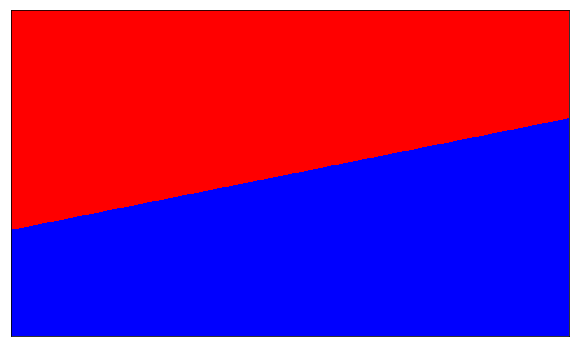

In [15]:
plot_logistic_moons(1000, 0.01)

In [16]:
interactive_plot = interactive(plot_logistic_moons, samples=(0, 1000), noise=(0, 0.5))
# output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=500, description='samples', max=1000), FloatSlider(value=0.25, descripti…

### Много хубаво, сега ако направим нещо подобно, ама да е за decision trees, всичко ще е точно

In [17]:
# Plotting decision regions adapted from 
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

#def plot_logistic_moons(samples, noise, degree=1, C=1):
#    X, y = make_moons(samples, noise=noise, random_state=0)
#    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_boundary(samples=500, noise=0.1, ests=2, depth=1):
    # def plot_logistic_moons(samples, noise, degree=1, C=1):
    X, y = make_moons(samples, noise=noise, random_state=0)
    # X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    clf = RandomForestClassifier(n_estimators=ests, random_state=23, max_depth=depth).fit(X,y) # без натройка на параметрите
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    
    plt.show()

In [18]:
interactive_plot = interactive(plot_boundary, samples=(0, 1000), noise=(0, 0.5), ests=(1, 100), depth=(1, 100))
interactive_plot

interactive(children=(IntSlider(value=500, description='samples', max=1000), FloatSlider(value=0.1, descriptio…

### Тъй като нямам какво друго да ви покажа, ще ви покажа формулата за корелационния коефициент на Пеарсон:

$$r=\frac{cov(x,y)}{\sqrt{\sigma(x)}\sqrt{\sigma(y)}}=\frac{n\Sigma xy - \Sigma x \Sigma y}{\sqrt{[n\Sigma x^2-(\Sigma x)^2][n\Sigma y^2-(\Sigma y)^2]}}$$